In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import sweetviz as sv


/Users/aweso/miniconda3/envs/stock577/lib/python3.11/site-packages/sweetviz/graph.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


In [34]:
import pandas as pd

sent = pd.read_csv("../data/aapl_daily_sentiment_raw_mean.csv")
print("SENTIMENT COLUMNS:", list(sent.columns))
sent.head()

SENTIMENT COLUMNS: ['ticker', 'date', 'polarity', 'intensity', 'relevance', 'short_term', 'long_term', 'volatility', 'novelty', 'credibility']


,ticker,date,polarity,intensity,relevance,short_term,long_term,volatility,novelty,credibility
0,AAPL,2016-01-06,-0.85,0.85,0.95,-0.7,-0.50,0.65,0.675,0.925
1,AAPL,2016-01-08,0.50,0.70,0.95,0.3,0.20,0.60,0.550,0.900
2,AAPL,2016-01-11,0.50,0.70,0.95,0.3,0.20,0.60,0.550,0.900
3,AAPL,2016-01-12,0.50,0.70,0.95,0.3,0.20,0.60,0.550,0.900
4,AAPL,2016-01-15,-0.20,0.65,0.95,-0.3,-0.15,0.50,0.450,0.900


In [2]:
sp500_historic_df = pd.read_csv("../data/sp500_historical.csv")
display(sp500_historic_df.head())

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2015-10-15,A,32.820099,35.580002,35.680000,34.790001,35.119999,1433000.0
1,2015-10-15,AAPL,25.137804,27.965000,28.025000,27.622499,27.732500,150694000.0
2,2015-10-15,ABBV,37.308048,56.139999,56.200001,53.849998,54.320000,7781600.0
3,2015-10-15,ABT,34.835648,41.869999,42.029999,40.910000,41.070000,7822000.0
4,2015-10-15,ACGL,24.330322,25.586666,25.606667,25.240000,25.253332,1433100.0


In [3]:
print(sp500_historic_df.columns)

Index(['Date', 'Ticker', 'Adj Close', 'Close', 'High', 'Low', 'Open',
       'Volume'],
      dtype='object')


In [4]:
# Lib for EDA visual

import numpy as np

if not hasattr(np, "VisibleDeprecationWarning"):
    np.VisibleDeprecationWarning = np.exceptions.VisibleDeprecationWarning
report = sv.analyze(sp500_historic_df)
report.show_html("sweetviz_eda.html")


                                             |      | [  0%]   00:00 -> (? left)

Report sweetviz_eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [5]:
tickers = sp500_historic_df["Ticker"]
unique_tickers = set(tickers.values)
print(len(unique_tickers), unique_tickers)
print(tickers.isna().any())
print(tickers.dtype)

503 {'CRL', 'FANG', 'GNRC', 'ATO', 'BBY', 'SW', 'KHC', 'SNA', 'MMC', 'JNJ', 'WSM', 'APA', 'AEE', 'DHR', 'QCOM', 'TSN', 'REGN', 'CPAY', 'PH', 'L', 'AVGO', 'LW', 'PANW', 'PEP', 'CHD', 'HUBB', 'SRE', 'VRSK', 'JCI', 'NKE', 'IPG', 'TGT', 'EPAM', 'ON', 'CHTR', 'AMD', 'EXPE', 'AMGN', 'AMP', 'TT', 'WTW', 'BRO', 'EIX', 'OMC', 'KIM', 'INVH', 'ETN', 'HWM', 'FRT', 'PHM', 'CRWD', 'KMI', 'HIG', 'INTU', 'EME', 'RSG', 'CFG', 'PAYC', 'AOS', 'EOG', 'AMCR', 'NEE', 'VZ', 'DOC', 'DRI', 'NDSN', 'HII', 'ABNB', 'FIS', 'AXP', 'IBKR', 'DDOG', 'EMN', 'TSCO', 'CMS', 'ALLE', 'WELL', 'LKQ', 'TRV', 'WRB', 'ROP', 'ARE', 'AAPL', 'LYB', 'CDW', 'CVS', 'CINF', 'CMI', 'ADBE', 'TDY', 'RCL', 'SBAC', 'PSX', 'REG', 'SYK', 'WY', 'TPL', 'LIN', 'DVN', 'KVUE', 'GEV', 'BG', 'MSI', 'FDX', 'IVZ', 'OKE', 'KLAC', 'AJG', 'CVX', 'EA', 'LEN', 'URI', 'BKNG', 'COO', 'HAS', 'DHI', 'PTC', 'WDAY', 'ROST', 'APTV', 'SHW', 'INTC', 'MCD', 'LOW', 'MPC', 'SBUX', 'VTRS', 'MET', 'MOH', 'IR', 'VICI', 'UHS', 'LUV', 'TPR', 'CCL', 'KMX', 'CI', 'STX', 'DE

In [6]:
dates = sp500_historic_df["Date"]
print(dates.isna().any())
print(dates.dtype)

False
object


In [7]:
adj_close = sp500_historic_df["Adj Close"]
print(adj_close.isna().any())
print(adj_close.dtype)

False
float64


Data Cleaning

In [8]:
# Utilizing counts for tickers

ticker_counts = sp500_historic_df['Ticker'].value_counts()
print(ticker_counts)
valid_tickers_t = ticker_counts[ticker_counts > 1826]
print(valid_tickers_t)

ticker_counts_map = {}
for index, row in sp500_historic_df.iterrows():
    ticker = row["Ticker"]
    if ticker in ticker_counts_map:
        ticker_counts_map[ticker] += 1
    else:
        ticker_counts_map[ticker] = 1


Ticker
A       2514
NKE     2514
NXPI    2514
NWSA    2514
NWS     2514
        ... 
GEHC     709
KVUE     614
VLTO     509
SOLV     390
GEV      389
Name: count, Length: 503, dtype: int64
Ticker
A       2514
NKE     2514
NXPI    2514
NWSA    2514
NWS     2514
        ... 
LW      2243
INVH    2188
IR      2118
VICI    1957
DAY     1878
Name: count, Length: 480, dtype: int64


In [9]:
# Create a set of valid tickers with 5 years or more data
valid_tickers = set()

for ticker, count in ticker_counts_map.items():
    if count > 1826:
        valid_tickers.add(ticker)

In [10]:
print((len(valid_tickers)), valid_tickers)

480 {'CRL', 'FANG', 'GNRC', 'ATO', 'BBY', 'SW', 'KHC', 'SNA', 'MMC', 'JNJ', 'WSM', 'APA', 'AEE', 'DHR', 'QCOM', 'TSN', 'REGN', 'CPAY', 'PH', 'L', 'AVGO', 'LW', 'PANW', 'PEP', 'CHD', 'HUBB', 'SRE', 'VRSK', 'JCI', 'NKE', 'IPG', 'TGT', 'EPAM', 'ON', 'CHTR', 'AMD', 'EXPE', 'AMGN', 'AMP', 'TT', 'WTW', 'BRO', 'EIX', 'OMC', 'KIM', 'INVH', 'ETN', 'HWM', 'FRT', 'PHM', 'KMI', 'HIG', 'INTU', 'EME', 'RSG', 'CFG', 'PAYC', 'AOS', 'EOG', 'AMCR', 'NEE', 'VZ', 'DOC', 'DRI', 'NDSN', 'HII', 'FIS', 'AXP', 'IBKR', 'EMN', 'TSCO', 'CMS', 'ALLE', 'WELL', 'LKQ', 'TRV', 'WRB', 'ROP', 'ARE', 'AAPL', 'LYB', 'CDW', 'CVS', 'CINF', 'CMI', 'ADBE', 'TDY', 'RCL', 'SBAC', 'PSX', 'REG', 'SYK', 'WY', 'TPL', 'LIN', 'DVN', 'BG', 'MSI', 'FDX', 'IVZ', 'OKE', 'KLAC', 'AJG', 'CVX', 'EA', 'LEN', 'URI', 'BKNG', 'COO', 'HAS', 'DHI', 'PTC', 'WDAY', 'ROST', 'APTV', 'SHW', 'INTC', 'MCD', 'LOW', 'MPC', 'SBUX', 'VTRS', 'MET', 'MOH', 'IR', 'VICI', 'UHS', 'LUV', 'TPR', 'CCL', 'KMX', 'CI', 'STX', 'DELL', 'AWK', 'STLD', 'DECK', 'WAB', 'FDS

In [11]:
sp500_historic_df = sp500_historic_df[sp500_historic_df['Ticker'].isin(valid_tickers)]

In [12]:
display(sp500_historic_df)

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2015-10-15,A,32.820099,35.580002,35.680000,34.790001,35.119999,1433000.0
1,2015-10-15,AAPL,25.137804,27.965000,28.025000,27.622499,27.732500,150694000.0
2,2015-10-15,ABBV,37.308048,56.139999,56.200001,53.849998,54.320000,7781600.0
3,2015-10-15,ABT,34.835648,41.869999,42.029999,40.910000,41.070000,7822000.0
4,2015-10-15,ACGL,24.330322,25.586666,25.606667,25.240000,25.253332,1433100.0
...,...,...,...,...,...,...,...,...
1230950,2025-10-14,XYZ,76.180000,76.180000,77.440002,71.919998,73.220001,5237500.0
1230951,2025-10-14,YUM,143.979996,143.979996,144.619995,139.289993,139.649994,2096000.0
1230952,2025-10-14,ZBH,98.370003,98.370003,98.739998,94.610001,94.610001,1349600.0
1230953,2025-10-14,ZBRA,288.989990,288.989990,291.000000,277.000000,277.000000,510600.0


In [13]:
# Forward fill NA values

sp500_historic_df = sp500_historic_df.groupby('Ticker').apply(lambda g: g.fillna(method='ffill')).reset_index(drop=True)
sp500_historic_df = sp500_historic_df.dropna(subset=["Adj Close"])

/var/folders/3b/72vh_t2s0gg5jjtnst_zhcnc0000gn/T/ipykernel_26797/3324818769.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sp500_historic_df = sp500_historic_df.groupby('Ticker').apply(lambda g: g.fillna(method='ffill')).reset_index(drop=True)
/var/folders/3b/72vh_t2s0gg5jjtnst_zhcnc0000gn/T/ipykernel_26797/3324818769.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sp500_historic_df = sp500_historic_df.groupby('Ticker').apply(lambda g: g.fillna(method='ffill')).reset_index(drop=True)


In [14]:
display(sp500_historic_df)

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2015-10-15,A,32.820099,35.580002,35.680000,34.790001,35.119999,1433000.0
1,2015-10-16,A,33.004589,35.779999,36.020000,35.369999,35.689999,1754300.0
2,2015-10-19,A,33.419693,36.230000,36.230000,35.590000,35.689999,3685800.0
3,2015-10-20,A,33.502701,36.320000,36.520000,36.029999,36.110001,2635800.0
4,2015-10-21,A,33.115288,35.900002,36.599998,35.799999,36.540001,2886400.0
...,...,...,...,...,...,...,...,...
1203367,2025-10-08,ZTS,143.490005,143.490005,144.869995,142.279999,142.460007,3016500.0
1203368,2025-10-09,ZTS,143.389999,143.389999,145.220001,143.250000,143.820007,3511000.0
1203369,2025-10-10,ZTS,141.110001,141.110001,143.490005,140.830002,143.389999,2958400.0
1203370,2025-10-13,ZTS,142.259995,142.259995,143.360001,140.649994,141.259995,2261300.0


In [15]:
sp500_historic_df.to_csv("../data/sp500_historical_clean.csv", index=False)

Exploratory Data Analysis

In [16]:
sp500_historic_df = pd.read_csv("../data/sp500_historical_clean.csv")

In [17]:
display(sp500_historic_df)

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2015-10-15,A,32.820099,35.580002,35.680000,34.790001,35.119999,1433000.0
1,2015-10-16,A,33.004589,35.779999,36.020000,35.369999,35.689999,1754300.0
2,2015-10-19,A,33.419693,36.230000,36.230000,35.590000,35.689999,3685800.0
3,2015-10-20,A,33.502701,36.320000,36.520000,36.029999,36.110001,2635800.0
4,2015-10-21,A,33.115288,35.900002,36.599998,35.799999,36.540001,2886400.0
...,...,...,...,...,...,...,...,...
1203367,2025-10-08,ZTS,143.490005,143.490005,144.869995,142.279999,142.460007,3016500.0
1203368,2025-10-09,ZTS,143.389999,143.389999,145.220001,143.250000,143.820007,3511000.0
1203369,2025-10-10,ZTS,141.110001,141.110001,143.490005,140.830002,143.389999,2958400.0
1203370,2025-10-13,ZTS,142.259995,142.259995,143.360001,140.649994,141.259995,2261300.0


In [18]:
apple_data = sp500_historic_df[sp500_historic_df["Ticker"] == "AAPL"]

In [19]:
apple_data

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
2514,2015-10-15,AAPL,25.137804,27.965000,28.025000,27.622499,27.732500,150694000.0
2515,2015-10-16,AAPL,24.953529,27.760000,28.000000,27.632500,27.945000,156930400.0
2516,2015-10-19,AAPL,25.108589,27.932501,27.937500,27.527500,27.700001,119036800.0
2517,2015-10-20,AAPL,25.567024,28.442499,28.542500,27.705000,27.834999,195871200.0
2518,2015-10-21,AAPL,25.564787,28.440001,28.895000,28.424999,28.500000,167180800.0
...,...,...,...,...,...,...,...,...
5023,2025-10-08,AAPL,258.059998,258.059998,258.519989,256.109985,256.519989,36496900.0
5024,2025-10-09,AAPL,254.039993,254.039993,258.000000,253.139999,257.809998,38322000.0
5025,2025-10-10,AAPL,245.270004,245.270004,256.380005,244.000000,254.940002,61999100.0
5026,2025-10-13,AAPL,247.660004,247.660004,249.690002,245.559998,249.380005,38142900.0


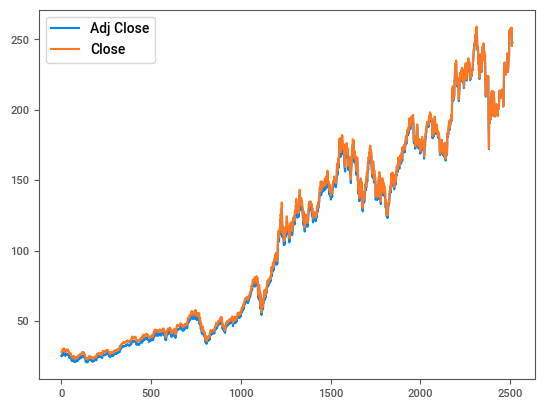

In [20]:
# Plot APPLE data
x = np.arange(0, apple_data.shape[0])
plt.plot(x, apple_data["Adj Close"], label="Adj Close")
plt.plot(x, apple_data["Close"], label="Close")
# plt.plot(x, apple_data["Volume"])
plt.legend()
plt.show()

In [21]:
# Plot data for APPLE, NVIDIA, MSFT, META, GOOGL, AMZN
major_stocks = ["AAPL", "NVDA", "MSFT", "META", "GOOGL", "AMZN"]
df_major = sp500_historic_df[sp500_historic_df["Ticker"].isin(major_stocks)].copy()

# Days since start
start_date = pd.Timestamp("2015-07-27")
df_major['Date'] = pd.to_datetime(df_major['Date'])
df_major['Days_Since_Start'] = (df_major['Date'] - start_date).dt.days

df_major['AdjClose_0'] = df_major.groupby('Ticker')['Adj Close'].transform('first')
df_major['AdjClose_Percent'] = ((df_major['Adj Close'] - df_major['AdjClose_0']) / df_major["AdjClose_0"]) * 100


In [22]:
display(df_major)

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume,Days_Since_Start,AdjClose_0,AdjClose_Percent
2514,2015-10-15,AAPL,25.137804,27.965000,28.025000,27.622499,27.732500,150694000.0,80,25.137804,0.000000
2515,2015-10-16,AAPL,24.953529,27.760000,28.000000,27.632500,27.945000,156930400.0,81,25.137804,-0.733058
2516,2015-10-19,AAPL,25.108589,27.932501,27.937500,27.527500,27.700001,119036800.0,84,25.137804,-0.116219
2517,2015-10-20,AAPL,25.567024,28.442499,28.542500,27.705000,27.834999,195871200.0,85,25.137804,1.707469
2518,2015-10-21,AAPL,25.564787,28.440001,28.895000,28.424999,28.500000,167180800.0,86,25.137804,1.698569
...,...,...,...,...,...,...,...,...,...,...,...
817273,2025-10-08,NVDA,189.110001,189.110001,189.600006,186.539993,186.570007,130168900.0,3726,0.666595,28269.570872
817274,2025-10-09,NVDA,192.570007,192.570007,195.300003,191.059998,192.229996,182997200.0,3727,0.666595,28788.628063
817275,2025-10-10,NVDA,183.160004,183.160004,195.619995,182.050003,193.509995,268774400.0,3728,0.666595,27376.974713
817276,2025-10-13,NVDA,188.320007,188.320007,190.110001,185.960007,187.970001,153482800.0,3731,0.666595,28151.059051


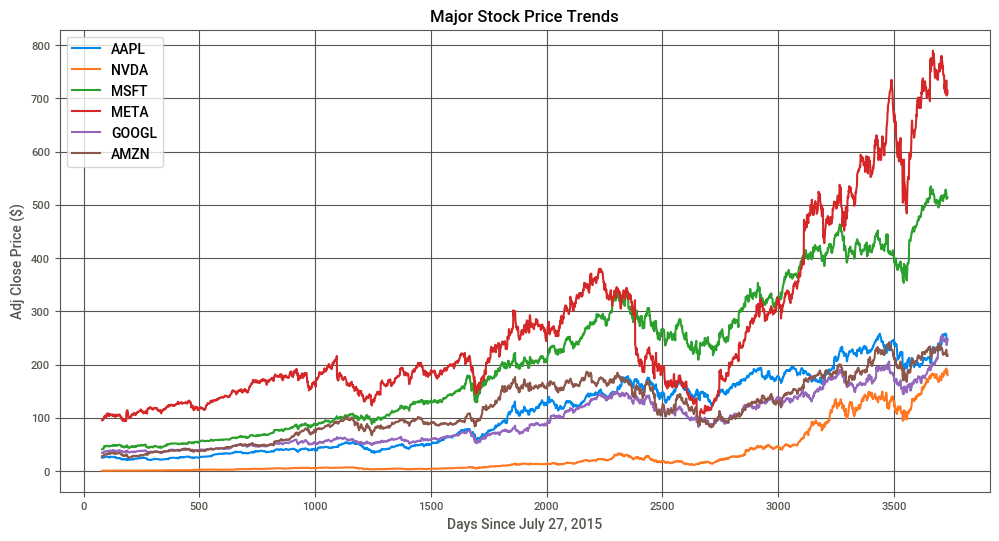

In [23]:
plt.figure(figsize=(12,6))
for ticker in major_stocks:
    subset = df_major[df_major['Ticker']==ticker]
    plt.plot(subset['Days_Since_Start'], subset['Adj Close'], label=ticker)
plt.title("Major Stock Price Trends")
plt.xlabel("Days Since July 27, 2015")
plt.ylabel("Adj Close Price ($)")
plt.legend()
plt.grid()
plt.show()

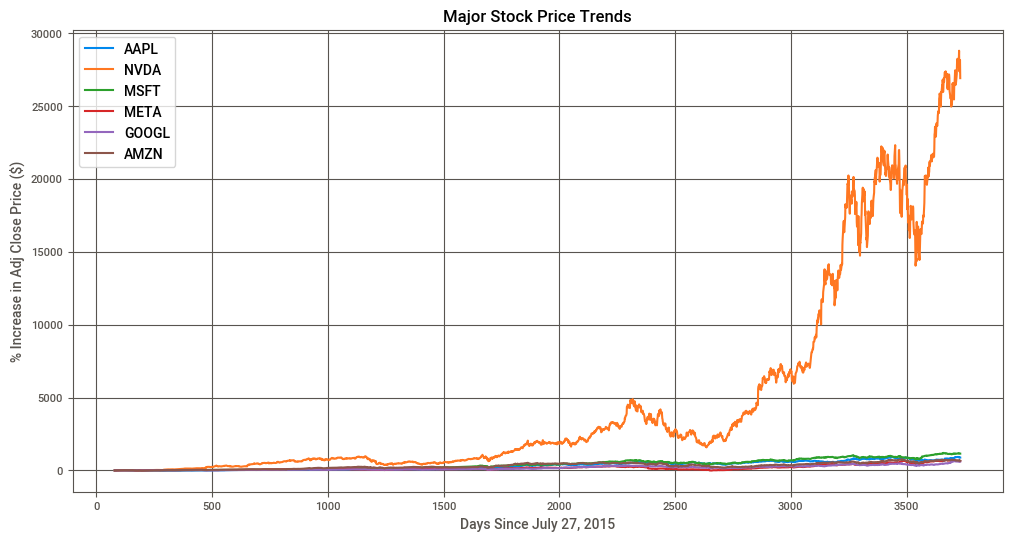

In [24]:
# With NVIDIA
plt.figure(figsize=(12,6))
for ticker in major_stocks:
    subset = df_major[df_major['Ticker']==ticker]
    plt.plot(subset['Days_Since_Start'], subset['AdjClose_Percent'], label=ticker)
plt.title("Major Stock Price Trends")
plt.xlabel("Days Since July 27, 2015")
plt.ylabel("% Increase in Adj Close Price ($)")
plt.legend()
plt.grid()
plt.show()

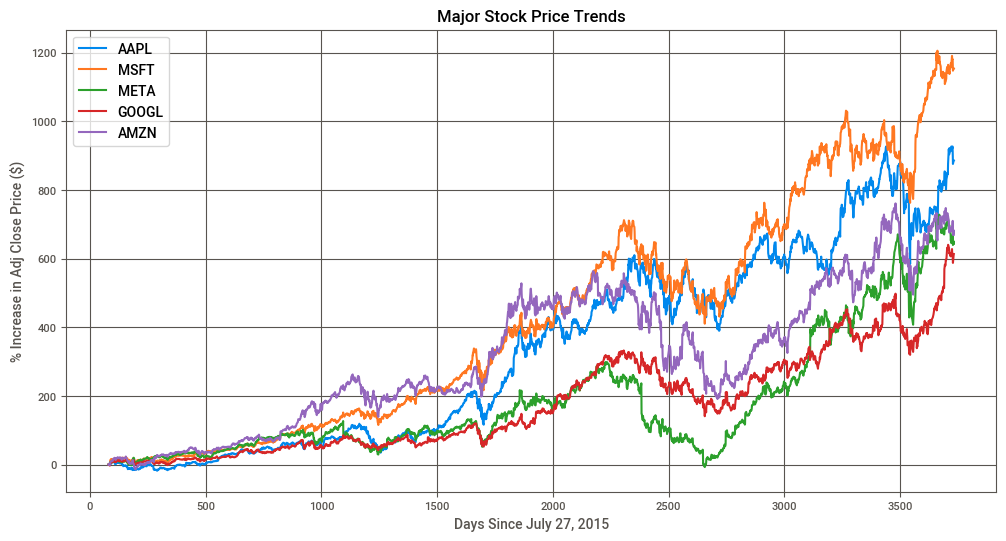

In [25]:
# Cleaner, Without NVIDIA -- too much increase
plt.figure(figsize=(12,6))
for ticker in major_stocks:
    if ticker != "NVDA":
        subset = df_major[df_major['Ticker']==ticker]
        plt.plot(subset['Days_Since_Start'], subset['AdjClose_Percent'], label=ticker)
plt.title("Major Stock Price Trends")
plt.xlabel("Days Since July 27, 2015")
plt.ylabel("% Increase in Adj Close Price ($)")
plt.legend()
plt.grid()
plt.show()

In [26]:
# Processing for all stocks
start_date = pd.Timestamp("2015-07-27")
sp500_historic_df['Date'] = pd.to_datetime(sp500_historic_df['Date'])
sp500_historic_df['Days_Since_Start'] = (sp500_historic_df['Date'] - start_date).dt.days

sp500_historic_df['AdjClose_0'] = sp500_historic_df.groupby('Ticker')['Adj Close'].transform('first')
sp500_historic_df['AdjClose_Percent'] = ((sp500_historic_df['Adj Close'] - sp500_historic_df['AdjClose_0']) / sp500_historic_df["AdjClose_0"]) * 100

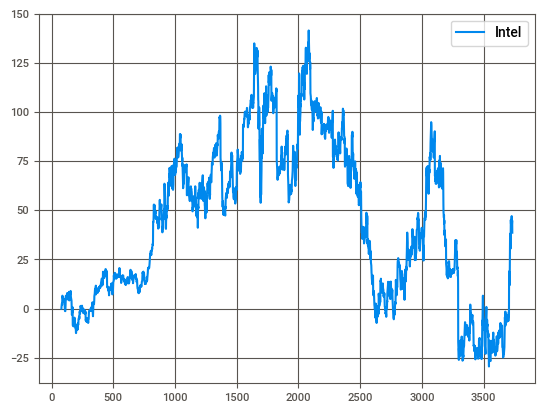

In [27]:
intel_data = sp500_historic_df[sp500_historic_df["Ticker"] == "INTC"]
plt.plot(intel_data["Days_Since_Start"], intel_data["AdjClose_Percent"], label = "Intel")
plt.legend()
plt.grid()
plt.show()

In [28]:
display(intel_data)

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume,Days_Since_Start,AdjClose_0,AdjClose_Percent
566871,2015-10-15,INTC,25.701742,32.750000,33.060001,32.459999,32.840000,37634800.0,80,25.701742,0.000000
566872,2015-10-16,INTC,25.929329,33.040001,33.200001,32.480000,32.750000,29371300.0,81,25.701742,0.885492
566873,2015-10-19,INTC,26.360960,33.590000,33.619999,32.869999,32.880001,37624000.0,84,25.701742,2.564876
566874,2015-10-20,INTC,26.243240,33.439999,33.700001,33.310001,33.400002,24416100.0,85,25.701742,2.106854
566875,2015-10-21,INTC,26.188305,33.369999,34.049999,33.320000,33.669998,31928800.0,86,25.701742,1.893112
...,...,...,...,...,...,...,...,...,...,...,...
569380,2025-10-08,INTC,37.430000,37.430000,37.790001,35.910000,36.549999,103202100.0,3726,25.701742,45.632152
569381,2025-10-09,INTC,37.799999,37.799999,38.099998,36.860001,37.529999,89884700.0,3727,25.701742,47.071739
569382,2025-10-10,INTC,36.369999,36.369999,39.650002,36.299999,38.459999,183063300.0,3728,25.701742,41.507913
569383,2025-10-13,INTC,37.220001,37.220001,37.509998,36.279999,36.439999,104020700.0,3731,25.701742,44.815091


In [30]:
import sweetviz as sv

report = sv.analyze(sp500_historic_df)
report.show_html("sweetviz_eda.html", open_browser=False)


                                             |      | [  0%]   00:00 -> (? left)

Report sweetviz_eda.html was generated.


In [41]:
import pandas as pd

sent = pd.read_csv("../data/aapl_daily_sentiment_raw_mean.csv")
stock = pd.read_csv("../data/sp500_historical_clean.csv")

print("SENT cols:", list(sent.columns))
print("STOCK cols:", list(stock.columns))

sent["date"] = pd.to_datetime(sent["date"], errors="coerce")
stock["Date"] = pd.to_datetime(stock["Date"], errors="coerce")

print("\nSent date range:", sent["date"].min(), "->", sent["date"].max())
print("Stock date range:", stock["Date"].min(), "->", stock["Date"].max())
print("Sent rows:", len(sent), "Stock rows:", len(stock))


SENT cols: ['ticker', 'date', 'polarity', 'intensity', 'relevance', 'short_term', 'long_term', 'volatility', 'novelty', 'credibility']
STOCK cols: ['Date', 'Ticker', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

Sent date range: 2016-01-06 00:00:00 -> 2022-04-29 00:00:00
Stock date range: 2015-10-15 00:00:00 -> 2025-10-14 00:00:00
Sent rows: 1010 Stock rows: 1203372


## Linear Regression Baselines (Market vs Sentiment vs Fusion)

- The sentiment CSV uses `date` (lowercase) while stock uses `Date`, so we rename `date -> Date` before merging.
- We lag sentiment features by 1 day (use yesterday’s sentiment) to avoid leakage when predicting next-day returns.
- Sentiment data ends around April 2022, so a 2023+ time split would produce 0 test rows. We split by the last ~252 rows for test and the previous ~252 rows for validation (time-ordered).

In [37]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# --- Load AAPL stock ---
stock = pd.read_csv("../data/sp500_historical_clean.csv")
stock["Date"] = pd.to_datetime(stock["Date"], errors="coerce")
aapl = stock[stock["Ticker"] == "AAPL"].sort_values("Date").copy()

# target: next-day log return
aapl["y"] = np.log(aapl["Close"].shift(-1)) - np.log(aapl["Close"])

# --- basic market features (optional but good baseline) ---
aapl["ret_1"]   = np.log(aapl["Close"]).diff(1)
aapl["ret_5"]   = np.log(aapl["Close"]).diff(5)
aapl["hl_pct"]  = (aapl["High"] - aapl["Low"]) / aapl["Close"]
aapl["oc_pct"]  = (aapl["Close"] - aapl["Open"]) / aapl["Open"]
aapl["vol_log"] = np.log(aapl["Volume"])

market_cols = ["ret_1", "ret_5", "hl_pct", "oc_pct", "vol_log"]

# --- Load sentiment ---
sent = pd.read_csv("../data/aapl_daily_sentiment_raw_mean.csv")
sent.columns = sent.columns.str.strip()

# rename lowercase date -> Date
sent = sent.rename(columns={"date": "Date"})
sent["Date"] = pd.to_datetime(sent["Date"], errors="coerce")
sent = sent.dropna(subset=["Date"]).sort_values("Date")

# sentiment feature columns (exclude Date + ticker)
sent_cols = [c for c in sent.columns if c not in ["Date", "ticker"]]

# lag sentiment 1 day to avoid leakage
sent[sent_cols] = sent[sent_cols].shift(1)

# --- Merge ---
df = aapl.merge(sent, on="Date", how="left")

# Build 3 datasets
df_sent = df.dropna(subset=["y"] + sent_cols).copy()
df_fuse = df.dropna(subset=["y"] + sent_cols + market_cols).copy()
df_mkt  = df.dropna(subset=["y"] + market_cols).copy()

print("Rows after dropna:")
print("  sentiment-only:", len(df_sent))
print("  fusion:", len(df_fuse))
print("  market-only:", len(df_mkt))
print("Date range df_sent:", df_sent["Date"].min(), "->", df_sent["Date"].max())

# --- Split by last N rows (guaranteed non-empty) ---
def split_last_n(d, val_n=252, test_n=252):
    d = d.sort_values("Date").reset_index(drop=True)
    if len(d) <= (val_n + test_n):
        raise ValueError(f"Not enough rows ({len(d)}) for val_n+test_n={val_n+test_n}. Reduce val_n/test_n.")
    train = d.iloc[:-(val_n+test_n)]
    val   = d.iloc[-(val_n+test_n):-test_n]
    test  = d.iloc[-test_n:]
    return train, val, test

train_s, val_s, test_s = split_last_n(df_sent)
train_f, val_f, test_f = split_last_n(df_fuse)
train_m, val_m, test_m = split_last_n(df_mkt)

print("\nSplit sizes:")
print("  sentiment:", len(train_s), len(val_s), len(test_s))
print("  fusion:", len(train_f), len(val_f), len(test_f))
print("  market:", len(train_m), len(val_m), len(test_m))

# --- Train/Eval (MSE) ---
def fit_eval(train, test, feat_cols):
    model = LinearRegression()
    model.fit(train[feat_cols], train["y"])
    pred = model.predict(test[feat_cols])
    return mean_squared_error(test["y"], pred)

mse_sent = fit_eval(train_s, test_s, sent_cols)
mse_fuse = fit_eval(train_f, test_f, sent_cols + market_cols)
mse_mkt  = fit_eval(train_m, test_m, market_cols)

print("\nRESULTS (Test MSE):")
print("  Market-only:", mse_mkt)
print("  Sentiment-only:", mse_sent)
print("  Fusion (Market+Sentiment):", mse_fuse)


Rows after dropna:
  sentiment-only: 1009
  fusion: 1009
  market-only: 2508
Date range df_sent: 2016-01-08 00:00:00 -> 2022-04-29 00:00:00

Split sizes:
  sentiment: 505 252 252
  fusion: 505 252 252
  market: 2004 252 252

RESULTS (Test MSE):
  Market-only: 0.0004233190374718831
  Sentiment-only: 0.0002934707496136404
  Fusion (Market+Sentiment): 0.00029707740667141375


### Interpretation (Test MSE)

- Market-only baseline MSE is higher than sentiment-only, suggesting lagged sentiment features are predictive in this window.
- Fusion (market + sentiment) is similar to sentiment-only here, meaning market features may not add much extra signal beyond sentiment for a linear model.